More or less a replication of [Mysteries of mode collapse by Janus](https://www.lesswrong.com/posts/t9svvNPNmFf5Qa3TA/mysteries-of-mode-collapse)

Using Pythia models of various sizes. 

Compares base models with SFT models and DPO finetuned models. 

TODO: Compare with RLHF models



## Import stuff

In [2]:
from transformers import GPTNeoXForCausalLM, AutoTokenizer
import torch
from sty import bg, fg, Style, RgbBg
import numpy as np
import matplotlib.pyplot as plt
# import os
# import lm_dataformat
# from tqdm import auto as tqdm_lib
torch.cuda.is_available()

True

## Get models

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [4]:
# model70m_base = GPTNeoXForCausalLM.from_pretrained("EleutherAI/pythia-70m").to(device)
# model70m_sft = GPTNeoXForCausalLM.from_pretrained("lomahony/eleuther-pythia70m-hh-sft").to(device)
# model70m_dpo = GPTNeoXForCausalLM.from_pretrained("lomahony/eleuther-pythia70m-hh-dpo").to(device)

# tokenizer70m = AutoTokenizer.from_pretrained("EleutherAI/pythia-70m")

In [3]:
# Let's look at slightly bigger models. 
model410m_base = GPTNeoXForCausalLM.from_pretrained("EleutherAI/pythia-410m").to(device)
model410m_sft = GPTNeoXForCausalLM.from_pretrained("lomahony/eleuther-pythia410m-hh-sft").to(device)
model410m_dpo = GPTNeoXForCausalLM.from_pretrained("lomahony/eleuther-pythia410m-hh-dpo").to(device)

tokenizer410m = AutoTokenizer.from_pretrained("EleutherAI/pythia-410m")

In [ ]:
# tokenizer70m.pad_token_id:0
# tokenizer70m.eos_token_id:0

## Utilities

In [ ]:
# !pip install sty

In [4]:
# https://github.com/feluxe/sty
def colour_text(token, probability): 
    if probability >= 0.99:
        print(bg.da_green + fg.white + token + fg.rs + bg.rs, end='')
         
    elif probability >= 0.95:
        print(bg.li_green + fg.white + token + fg.rs + bg.rs, end='')
         
    elif probability >= 0.9:
        print(bg.green + token + bg.rs, end='')

    elif probability >= 0.8:
        # print(bg.yellow + token + bg.rs)
        bg.yellow_green = Style(RgbBg(153, 153, 0))
        print(bg.yellow_green + token + bg.rs, end='')

    elif probability >= 0.5:
        # bg.orange = Style(RgbBg(255, 150, 50))
        # print(bg.orange + token + bg.rs)
        print(bg.yellow + token + bg.rs, end='')

    elif probability >= 0.2:
        # print(bg.li_yellow + token + bg.rs)
        bg.orange = Style(RgbBg(255, 150, 50))
        print(bg.orange + token + bg.rs, end='')
        
    elif probability >= 0.1:
        bg.da_orange = Style(RgbBg(255, 120, 0))
        print(bg.da_orange + token + bg.rs, end='')
        
    elif probability >= 0.05:
        print(bg.red + fg.white + token + fg.rs + bg.rs, end='')

    elif probability >= 0.01:
        print(bg.li_red + fg.white + token + fg.rs + bg.rs, end='')
        
    elif probability < 0.01:
        print(bg.da_red + fg.white + token + fg.rs + bg.rs, end='')
        

In [5]:
probs = [0,0.01, 0.05, 0.1, 0.2, 0.5, 0.8, 0.9, 0.98, 0.99]
for i in probs: 
    colour_text("test",i)

testtesttesttesttesttesttesttesttesttest

## Probability spectrum Illustrations

In [6]:
def plot_probability_spectrum(model, text, tokenizer, temperature=1.0, print_output_plain=False): 
    inputs = tokenizer(text, return_tensors="pt").to(device) # , temperature
    tokens = model.generate(**inputs, temperature=temperature, max_new_tokens=100, output_scores=True, renormalize_logits=True, return_dict_in_generate=True) # shape input plus generated
    out = tokenizer.decode(tokens['sequences'][0]) 
    if print_output_plain: 
        print(out)
    input_length = inputs.input_ids.shape[1] # shape num tokens generated
    generated_tokens = tokens.sequences[:, input_length:]
    transition_scores = model.compute_transition_scores(tokens.sequences, tokens.scores, normalize_logits=True)
    
    for idx, tok in enumerate(tokens['sequences'][:, input_length:][0]): 
        colour_text(f"{tokenizer.decode(tok)}", np.exp(transition_scores[0][idx].cpu()))

### 70m

In [7]:
text = "are bugs real?"

In [36]:
plot_probability_spectrum(model70m_base, text, tokenizer70m)

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.




I'm not sure if I'm wrong, but I'm not sure if I'm wrong.

A:

I think you're right.  I'm not sure if I'm wrong.

A:

I think you're right.  I'm not sure if I'm wrong.

A:

I think you're right.  I'm not sure if I'm wrong.

A:

I think you're right.  

In [37]:
plot_probability_spectrum(model70m_sft, text, tokenizer70m, print_output_plain=True)

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


are bugs real?<|endoftext|>
<|endoftext|>

In [38]:
plot_probability_spectrum(model70m_dpo, text, tokenizer70m)

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.




I’m sorry, I’m not sure what you mean.  I’m sorry, I’m not sure what you mean.  I’m sorry, I’m not sure what you mean.  I’m sorry, I’m not sure what you mean.  I’m sorry, I’m not sure what you mean.  I’m sorry, I’m not sure what you mean.  I’m sorry, I’m

In [19]:
text = "Are AIs real?"

In [20]:
plot_probability_spectrum(model70m_base, text, tokenizer70m)

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.




I'm not sure if I'm wrong, but I'm not sure if I'm wrong.

A:

I'm not sure if I'm wrong, but I'm not sure if I'm wrong, but I'm not sure if I'm wrong.

A:

I'm not sure if I'm wrong, but I'm not sure if I'm wrong, but I'm not sure if I'm wrong, but I'm not sure if I'm wrong

In [21]:
plot_probability_spectrum(model70m_sft, text, tokenizer70m)

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


<|endoftext|>

In [22]:
plot_probability_spectrum(model70m_dpo, text, tokenizer70m)

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


  Are you sure?  Are you sure?  Are you sure?  Are you sure?  Are you sure?  Are you sure?  Are you sure?  Are you sure?  Are you sure?  Are you sure?  Are you sure?  Are you sure?  Are you sure?  Are you sure?  Are you sure?  Are you sure?  Are you sure?  Are you sure?  Are you sure?  Are you sure?

### 410m

In [104]:
text = "are bugs real?"

In [114]:
plot_probability_spectrum(model410m_base, text, tokenizer410m, temperature = 1)

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



<james_w> I think it's a bug in the way the package is packaged
<james_w> I think it's a bug in the way the package is packaged
<james_w> I think it's a bug in the way the package is packaged
<james_w> I think it's a bug in the way the package is packaged
<james_w> I think it's a bug in the way the package is packaged

In [115]:
plot_probability_spectrum(model410m_sft, text, tokenizer410m, temperature = 1)

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



<jamespage> I think the bug is that the package is not installed correctly
<jamespage> I'm not sure if I can reproduce it
<jamespage> I'll try to reproduce it and see if I can reproduce it
<jamespage> I'm not sure if I can reproduce it
<jamespage> I'll try to reproduce it and see if I can reproduce it
<jamespage> I'm not sure if I can reproduce

In [116]:
plot_probability_spectrum(model410m_dpo, text, tokenizer410m, temperature = 1)

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



<james_w> I think it's a bug in the way that the package is packaged, but I don't know enough about the package to know if that's a good idea
<james_w> I think it's a bug in the way that the package is packaged, but I don't know enough about the package to know if that's a good idea
<james_w> I think it's a bug in the way that the package is packaged,

In [18]:
text = "Are AIs real?"

In [19]:
plot_probability_spectrum(model410m_base, text, tokenizer410m)

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.




A:

Yes, they are.

A:

Yes, they are.

A:

Yes, they are.

A:

Yes, they are.

A:

Yes, they are.

A:

Yes, they are.

A:

Yes, they are.

A:

Yes, they are.

A:

Yes, they are.


In [20]:
plot_probability_spectrum(model410m_sft, text, tokenizer410m)

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.




A:

Yes, AIs are real.  They are a type of computer program that is used to simulate human behavior.  They are also used to simulate human emotions, and to simulate human behavior.  They are also used to simulate human emotions, and to simulate human behavior.  They are also used to simulate human emotions, and to simulate human behavior.  They are also used to simulate human emotions, and to simulate human behavior.  They are also used to simulate

In [21]:
plot_probability_spectrum(model410m_dpo, text, tokenizer410m)

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.




A: Yes, AI is a computer program that is programmed to simulate human behavior.  AI is a computer program that is programmed to simulate human behavior.  AI is a computer program that is programmed to simulate human behavior.  AI is a computer program that is programmed to simulate human behavior.  AI is a computer program that is programmed to simulate human behavior.  AI is a computer program that is programmed to simulate human behavior.  AI is a computer program that is programmed to simulate

## Random integer

In [71]:
torch.set_printoptions(precision=4)
def output_probs(model, text, tokenizer, n=50):
    inputs = tokenizer(text, return_tensors="pt").to(device)
    tokens = model.generate(**inputs, max_new_tokens=1, output_scores=True, 
                            renormalize_logits=True, return_dict_in_generate=True) # shape input plus generated
    arr = np.exp(tokens.scores[0].cpu()[0])
    toks = list(np.asarray(arr).argsort()[-n:][-n:][::-1])
    # np.exp(tokens.scores[tok_id].cpu()[0])[toks]) #€€€ changed to 0
    tok_probs = np.exp(tokens.scores[0].cpu()[0])[toks]
    print(toks)
    print(tokenizer.decode(toks))
    print(tok_probs)
    for idx, tok in enumerate(toks): 
        # print(f"{tokenizer.decode(tok)}", tok_probs[idx])
        colour_text(f"{tokenizer.decode(tok)}", tok_probs[idx])
        print(f" - {tok_probs[idx]}") 
    return toks, tok_probs

### 70m

In [25]:
text = "Q: Tell me a random integer between 0 and 100. \
\
A: Ok, the integer is:"

In [297]:
toks_base, tok_probs_base = output_probs(model70m_base, text, tokenizer70m)

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


 1 - 0.09332405775785446
 0 - 0.09178750962018967
 a - 0.04898060858249664
 not - 0.0457162968814373
 zero - 0.027358494699001312
 the - 0.02310575544834137
 10 - 0.022215163335204124
 between - 0.018665986135601997
 100 - 0.01423156913369894
 $ - 0.012369129806756973
 one - 0.011725161224603653
 at - 0.010460448451340199
 too - 0.010163397528231144
 less - 0.009555789642035961
 equal - 0.009554623626172543
 in - 0.009332151152193546
 going - 0.009258396923542023
: - 0.008506360463798046
 about - 0.008442224934697151
 2 - 0.008331655524671078
 an - 0.008035983890295029
, - 0.007643691264092922
 5 - 0.007336522918194532
 always - 0.006612641271203756
 " - 0.006079964339733124
 just - 0.00580225046724081
 4 - 0.0053786649368703365
 greater - 0.005312758032232523
 so - 0.004954453092068434

 - 0.00474955327808857
 n - 0.004572063218802214
 either - 0.004425989463925362
 12 - 0.004381907172501087
 up - 0.004031877964735031
 over - 0.003913558553904295
 from - 0.003911647945642471
 16 - 0.0

In [298]:
toks_sft, tok_probs_sft = output_probs(model70m_sft, text, tokenizer70m)

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


 a - 0.14539147913455963
 0 - 0.11113584786653519
 1 - 0.10873381048440933
 the - 0.05491558834910393
 between - 0.03233448043465614
 not - 0.027640271931886673
 “ - 0.02400842308998108
 zero - 0.021652765572071075
 $ - 0.020293768495321274
 10 - 0.020094098523259163
 100 - 0.014938135631382465
 one - 0.012425033375620842
 about - 0.01229527872055769
 in - 0.011477258987724781
, - 0.010664083063602448
: - 0.010157122276723385
 always - 0.009561555460095406
 at - 0.009117020294070244
 n - 0.009039447642862797
 too - 0.007638040464371443
 equal - 0.007401234935969114
 2 - 0.0071998415514826775
 called - 0.006895342376083136
 less - 0.0068483659997582436
 going - 0.006605332717299461
 random - 0.005634687840938568
 an - 0.0055541060864925385
 5 - 0.005472672171890736
 very - 0.0053884838707745075
 now - 0.005272663198411465
 so - 0.005202971398830414
 from - 0.0043387627229094505
 really - 0.0038698255084455013
 actually - 0.003858504816889763
 probably - 0.00357725634239614
 greater - 0.

In [299]:
toks_dpo, tok_probs_dpo = output_probs(model70m_dpo, text, tokenizer70m)

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


 a - 0.1610966920852661
 1 - 0.12240640819072723
 0 - 0.0739537924528122
 the - 0.0557483434677124
 between - 0.03988533839583397
 not - 0.024271544069051743
 10 - 0.02186603657901287
 zero - 0.021213997155427933
 $ - 0.01673460192978382
 equal - 0.015309740789234638
 “ - 0.015083429403603077
 one - 0.014486128464341164
: - 0.01420073863118887
 going - 0.01242396142333746
 always - 0.012313740327954292
 100 - 0.011787205934524536
, - 0.010656654834747314
 at - 0.010121592320501804
 in - 0.009332418441772461
 about - 0.008002929389476776
 called - 0.007287639658898115
 2 - 0.006507924757897854
 an - 0.0064431061036884785
 very - 0.006410157307982445
 random - 0.00640624575316906
 too - 0.005969820078462362
 less - 0.005875114817172289
 usually - 0.005559731274843216
 actually - 0.0054922765120863914
 now - 0.005186036694794893
 " - 0.00489030173048377
 defined - 0.004490332677960396
 from - 0.004375084303319454
 greater - 0.004226523917168379
 5 - 0.004213131498545408
 probably - 0.0039

(0.0, 1.0)

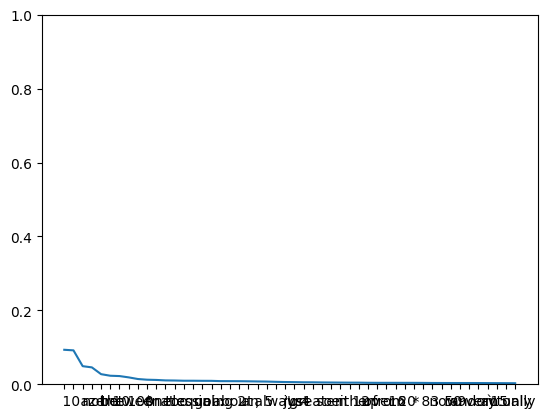

In [302]:
plt.plot([tokenizer70m.decode(toks_base[i]) for i in range(len(toks_base))], tok_probs_base)
plt.ylim((0,1))

(0.0, 1.0)

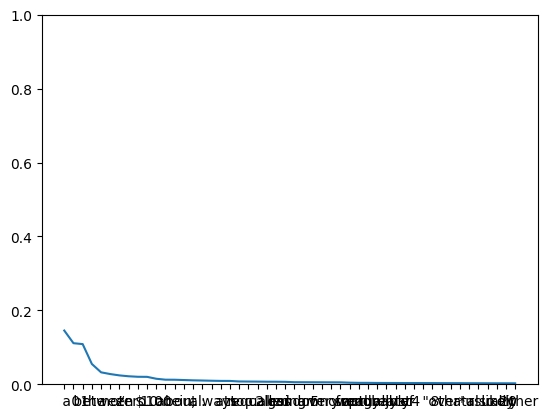

In [303]:
plt.plot([tokenizer70m.decode(toks_sft[i]) for i in range(len(toks_sft))], tok_probs_sft)
plt.ylim((0,1))

(0.0, 1.0)

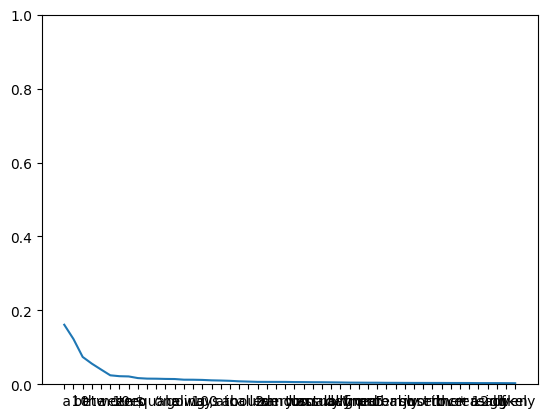

In [301]:
plt.plot([tokenizer70m.decode(toks_dpo[i]) for i in range(len(toks_dpo))], tok_probs_dpo)
plt.ylim((0,1))

### 410m

In [84]:
text = "Q: Tell me a random integer between 0 and 100. \
\
A: Ok, the integer is:"

In [85]:
toks_base, tok_probs_base = output_probs(model410m_base, text, tokenizer410m)

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


[187, 470, 2233, 337, 608, 370, 884, 495, 374, 8688, 577, 313, 8437, 898, 721, 2456, 50276, 1249, 1903, 818, 209, 854, 1384, 10694, 2030, 2145, 11334, 1458, 9098, 15567, 4567, 3318, 3495, 1722, 11805, 1884, 544, 1269, 5329, 3307, 6879, 3019, 5325, 535, 5922, 30321, 1668, 3925, 1052, 4562]

 0 100 1 5 $ 10 3 2 99 4 ( 101 9 6 50   12 11 7  8 20 97 25 13 111 15 1000 123 32 $$ 23 17 113 30 [ x 45 22 75 $( 95

 33 10000 16 60 200 31
tensor([0.1238, 0.0786, 0.0438, 0.0363, 0.0279, 0.0277, 0.0257, 0.0247, 0.0231,
        0.0180, 0.0160, 0.0156, 0.0156, 0.0153, 0.0126, 0.0121, 0.0109, 0.0109,
        0.0108, 0.0090, 0.0090, 0.0090, 0.0075, 0.0072, 0.0061, 0.0059, 0.0059,
        0.0057, 0.0053, 0.0047, 0.0047, 0.0045, 0.0045, 0.0045, 0.0043, 0.0041,
        0.0039, 0.0038, 0.0036, 0.0035, 0.0035, 0.0034, 0.0034, 0.0032, 0.0032,
        0.0031, 0.0030, 0.0030, 0.0030, 0.0030])

 - 0.12381120771169662
 0 - 0.07856938987970352
 100 - 0.04383006691932678
 1 - 0.03627283126115799
 5 - 0.02785963378

In [86]:
toks_sft, tok_probs_sft = output_probs(model410m_sft, text, tokenizer410m)

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


[187, 470, 50276, 337, 2233, 495, 374, 608, 884, 577, 898, 721, 8437, 854, 8688, 1903, 0, 1249, 818, 209, 2456, 10694, 2145, 535, 313, 1384, 1458, 4567, 50275, 1722, 11334, 2030, 3495, 3307, 5345, 370, 1668, 6879, 5329, 1638, 655, 5922, 4562, 7251, 1283, 7584, 11422, 1884, 5325, 5976]

 0   1 100 3 2 5 10 4 9 6 101 8 99 11<|endoftext|> 12 7  50 97 13

 ( 20 15 32    17 111 25 23 22 37 $ 16 75 45 14 19 33 31 65 18 49 87 30 95 42
tensor([0.1275, 0.0819, 0.0506, 0.0415, 0.0329, 0.0316, 0.0315, 0.0291, 0.0211,
        0.0209, 0.0203, 0.0187, 0.0182, 0.0142, 0.0133, 0.0129, 0.0124, 0.0121,
        0.0114, 0.0114, 0.0089, 0.0075, 0.0073, 0.0063, 0.0062, 0.0062, 0.0060,
        0.0059, 0.0058, 0.0057, 0.0055, 0.0053, 0.0047, 0.0046, 0.0040, 0.0039,
        0.0039, 0.0039, 0.0038, 0.0038, 0.0037, 0.0037, 0.0037, 0.0037, 0.0036,
        0.0036, 0.0035, 0.0035, 0.0033, 0.0032])

 - 0.12748804688453674
 0 - 0.08186342567205429
   - 0.05062537267804146
 1 - 0.04147481545805931
 100 - 0.03293832018

In [87]:
toks_dpo, tok_probs_dpo = output_probs(model410m_dpo, text, tokenizer410m)

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


[187, 50276, 470, 2233, 337, 608, 495, 374, 8688, 8437, 577, 884, 10694, 898, 721, 1249, 2456, 1903, 854, 818, 1384, 209, 2145, 5345, 11334, 370, 1722, 1458, 5325, 3495, 6879, 3307, 5329, 11422, 50275, 4567, 11456, 2030, 7584, 7251, 655, 10508, 4562, 5976, 4791, 1668, 5922, 7609, 535, 1638]

   0 100 1 5 3 2 99 101 4 10 97 9 6 12 50 11 8 7 20  13 37 111 $ 17 15 95 23 75 22 45 87    32 93 25 49 65 19 98 31 42 35 16 33 41

 14
tensor([0.1010, 0.0864, 0.0575, 0.0452, 0.0384, 0.0343, 0.0311, 0.0288, 0.0250,
        0.0221, 0.0217, 0.0205, 0.0189, 0.0187, 0.0185, 0.0140, 0.0139, 0.0136,
        0.0127, 0.0089, 0.0088, 0.0084, 0.0080, 0.0076, 0.0072, 0.0068, 0.0067,
        0.0066, 0.0064, 0.0058, 0.0058, 0.0058, 0.0057, 0.0051, 0.0050, 0.0050,
        0.0050, 0.0049, 0.0047, 0.0047, 0.0045, 0.0045, 0.0044, 0.0040, 0.0040,
        0.0039, 0.0039, 0.0038, 0.0038, 0.0037])

 - 0.10101088881492615
   - 0.08640545606613159
 0 - 0.05747900903224945
 100 - 0.045211754739284515
 1 - 0.0384499169886

(0.0, 1.0)

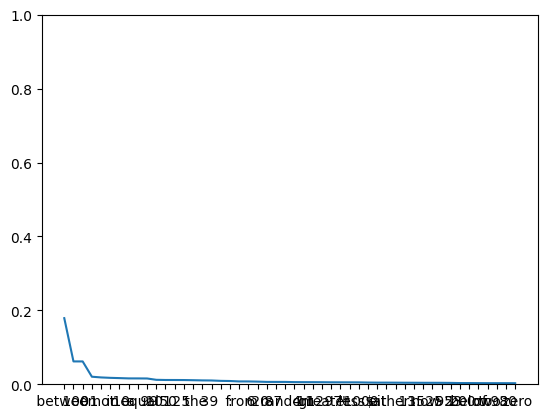

In [80]:
plt.plot([tokenizer410m.decode(toks_base[i]) for i in range(len(toks_base))], tok_probs_base)
plt.ylim((0,1))

(0.0, 1.0)

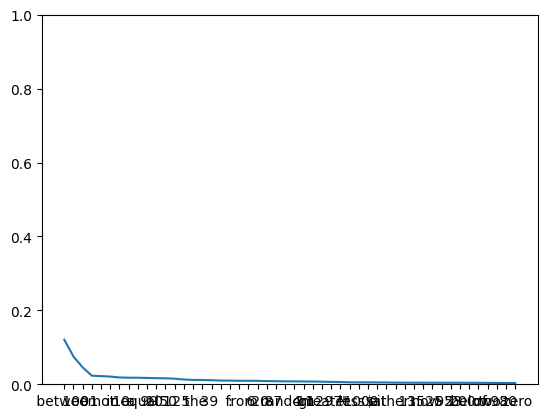

In [81]:
plt.plot([tokenizer410m.decode(toks_base[i]) for i in range(len(toks_sft))], tok_probs_sft)
plt.ylim((0,1))

(0.0, 1.0)

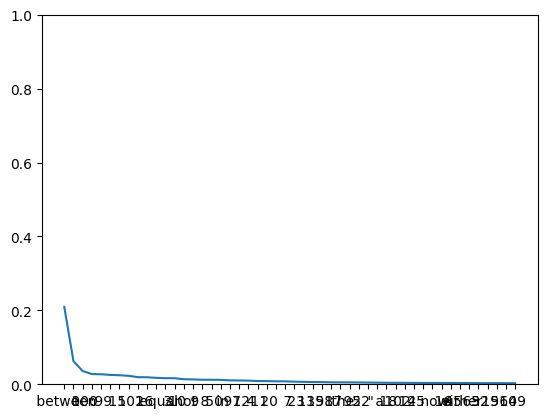

In [82]:
plt.plot([tokenizer410m.decode(toks_dpo[i]) for i in range(len(toks_dpo))], tok_probs_dpo)
plt.ylim((0,1))

In [83]:
text = "Q: I've just rolled a fair d6 (6 sided die). Please look at the result and tell me what number came up. \
A: The number that came up was"

In [53]:
toks_base, tok_probs_base = output_probs(model410m_base, text, tokenizer410m, n=20)

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


 6 - 0.11472945660352707
 the - 0.05981464684009552
 1 - 0.048051510006189346
 2 - 0.039072755724191666
 3 - 0.03456728905439377
 5 - 0.034392453730106354
 4 - 0.0308868158608675
 $ - 0.02885430119931698
 a - 0.0282245185226202
 7 - 0.027423636987805367
 9 - 0.02364640310406685
: - 0.02254585362970829
 0 - 0.02235112152993679
 8 - 0.019492262974381447
 12 - 0.017505647614598274
 " - 0.01289732102304697
 11 - 0.011699113994836807
 - - 0.011362855322659016
 10 - 0.011100132949650288
 13 - 0.010192924179136753


In [54]:
toks_base, tok_probs_base = output_probs(model410m_sft, text, tokenizer410m, n=20)

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


 6 - 0.181101456284523
 5 - 0.04218200966715813
 3 - 0.041237689554691315
 1 - 0.03837651014328003
 7 - 0.036720890551805496
 2 - 0.03538735955953598
 4 - 0.033085428178310394
 the - 0.0322624035179615
 9 - 0.032215457409620285
 8 - 0.03143259137868881
 12 - 0.023358721286058426
: - 0.023263169452548027
 " - 0.022330278530716896
 0 - 0.021233700215816498
 a - 0.01996217481791973
 11 - 0.015344726853072643
 13 - 0.011648176237940788
 10 - 0.01148147415369749
 16 - 0.011344660073518753
 - - 0.007719722110778093


In [55]:
toks_base, tok_probs_base = output_probs(model410m_dpo, text, tokenizer410m, n=20)

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


 6 - 0.44059988856315613
 the - 0.06103740260004997
 5 - 0.04306517913937569
 " - 0.03670252487063408
 1 - 0.03501064330339432
 7 - 0.0309411883354187
 3 - 0.028897320851683617
 4 - 0.022823894396424294
 a - 0.02041005901992321
 2 - 0.019075479358434677
: - 0.019042473286390305
 correct - 0.018648048862814903
 8 - 0.01799110881984234
 9 - 0.013801894150674343
 12 - 0.012299316935241222
 $ - 0.01017284207046032
 11 - 0.007393239066004753
 0 - 0.0071251047775149345
 ' - 0.005958814173936844
 D - 0.005327425431460142


### “block multiverse” plots